In [1]:
import torch
import sys
import os
sys.path.insert(0,"..")
from src import CENTRES_DIR, MODELS_DIR, LOG_DIR

2020-10-21 05:52:18,313 - root - INFO - Autodiscovery repository dir: /home/nina/ML/fresh
2020-10-21 05:52:18,314 - root - INFO - /home/nina/ML/fresh/dataset


In [91]:
experiment = "CentreTest" # what was trained
test_name = 'video' # on what we test
EXP_DIR = os.path.join(LOG_DIR, experiment)
MDL_DIR = os.path.join(MODELS_DIR, experiment)

In [92]:
from Models import CentresModel, get_mask
from Training import CentresTrainer

image_model = CentresModel().cuda()
LossModel = torch.nn.L1Loss(reduction='mean')
trainer = CentresTrainer( image_model = image_model,
                            loss_model = LossModel,
                            lr=0.0)

Optimizer: ADAM
Learning rate =  0.0


In [93]:
epoch=99
trainer.load_models(epoch, MDL_DIR)
trainer.new_log(os.path.join(EXP_DIR,"test_loss.dat"), log_dir=os.path.join(EXP_DIR,test_name)) #set logger

Model loaded succesfully


In [94]:
from Dataset import get_stream_centres
stream_valid = get_stream_centres(CENTRES_DIR, 'video_set.dat')

Dataset folder:  /home/nina/ML/fresh/dataset_centres
Dataset list path:  video_set.dat
Dataset size:  440
Dataset output type: 3d density maps


In [100]:
trainer.new_log(os.path.join(EXP_DIR,"test_loss.dat"), log_dir=os.path.join(EXP_DIR,test_name))
mask = get_mask()
for data in stream_valid:
    trainer.predict(data,mask)
# this for loop loads batches of images and outputs logs *.th of 3 types
# "grnd" (ground truth), "pred" (model prediction) and "sign" (signature frame, I guess)

In [101]:
import numpy as np

def get_losses(files):
    loss = []
    for file in files:
        file_base = file[:-7]
        grnd = torch.load(os.path.join(log_dir,f"{file_base}grnd.th"))
        pred = torch.load(os.path.join(log_dir,f"{file_base}pred.th")).detach()
        loss.append(LossModel(pred,grnd).data.numpy())
    return np.array(loss)

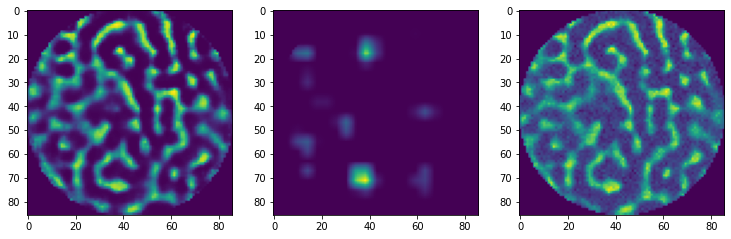

In [106]:
import glob
import matplotlib.pyplot as plt
log_dir = os.path.join(LOG_DIR, experiment, test_name)

files = glob.glob(os.path.join(log_dir, '*grnd.th'))
loss = get_losses(files) #evaluate losses on all test samples
idx = np.argmin(loss) #find the worst(max) or the best(min), or any index
file_base = files[idx][:-7]

img_grnd = torch.load(os.path.join(log_dir,f"{file_base}grnd.th"))
img_pred = torch.load(os.path.join(log_dir,f"{file_base}pred.th")).detach()
img_sign = torch.load(os.path.join(log_dir,f"{file_base}sign.th"))
fig, (ax_grnd,ax_pred,ax_sign) = plt.subplots(1,3,figsize=(12.5,4))
ax_grnd.imshow(img_grnd)
ax_pred.imshow(img_pred)
ax_sign.imshow(img_sign)

In [103]:
files[38]

'/home/nina/ML/fresh/log/CentreTest/video/VidSpiral1071_grnd.th'